# imports

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# connection


In [2]:
Connection = sqlite3.connect('travel.sqlite')
cursor = Connection.cursor()

In [3]:
cursor.execute("""select name from sqlite_master where type = 'table';""")
print('List of tables present in the database')
table_list = [table [0] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Exploration


In [4]:
aircrafts_data=pd.read_sql_query('select * from aircrafts_data',Connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [5]:
aircrafts_data.describe

<bound method NDFrame.describe of   aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600
5           319  {"en": "Airbus A319-100", "ru": "Аэробус A319-...   6700
6           733    {"en": "Boeing 737-300", "ru": "Боинг 737-300"}   4200
7           CN1  {"en": "Cessna 208 Caravan", "ru": "Сессна 208...   1200
8           CR2  {"en": "Bombardier CRJ-200", "ru": "Бомбардье ...   2700>

In [6]:
aircrafts_data.shape

(9, 3)

In [7]:
aircrafts_data.size

27

In [8]:
airports_data=pd.read_sql_query('select * from airports_data',Connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [9]:
boarding_passes=pd.read_sql_query('select * from boarding_passes',Connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [10]:
bookings=pd.read_sql_query('select * from bookings',Connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [11]:

flights=pd.read_sql_query('select * from flights',Connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [12]:
seats=pd.read_sql_query('select * from seats',Connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [13]:

ticket_flights=pd.read_sql_query('select * from ticket_flights',Connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [14]:
tickets=pd.read_sql_query('select * from tickets',Connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [15]:
for table in table_list:
    print("\nTable :",table )
    col_info=Connection.execute('PRAGMA table_info({})'.format(table))
    for col in col_info:
        print(col[1:2])


Table : aircrafts_data
('aircraft_code',)
('model',)
('range',)

Table : airports_data
('airport_code',)
('airport_name',)
('city',)
('coordinates',)
('timezone',)

Table : boarding_passes
('ticket_no',)
('flight_id',)
('boarding_no',)
('seat_no',)

Table : bookings
('book_ref',)
('book_date',)
('total_amount',)

Table : flights
('flight_id',)
('flight_no',)
('scheduled_departure',)
('scheduled_arrival',)
('departure_airport',)
('arrival_airport',)
('status',)
('aircraft_code',)
('actual_departure',)
('actual_arrival',)

Table : seats
('aircraft_code',)
('seat_no',)
('fare_conditions',)

Table : ticket_flights
('ticket_no',)
('flight_id',)
('fare_conditions',)
('amount',)

Table : tickets
('ticket_no',)
('book_ref',)
('passenger_id',)


How many planes have more than 100 seats

In [16]:
pd.read_sql_query("""select aircraft_code, count(*) as No_seats from seats group by aircraft_code  having No_seats > 100
""",Connection)


,aircraft_code,No_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


How the number of tickets booked and  total amount earned changed with the time

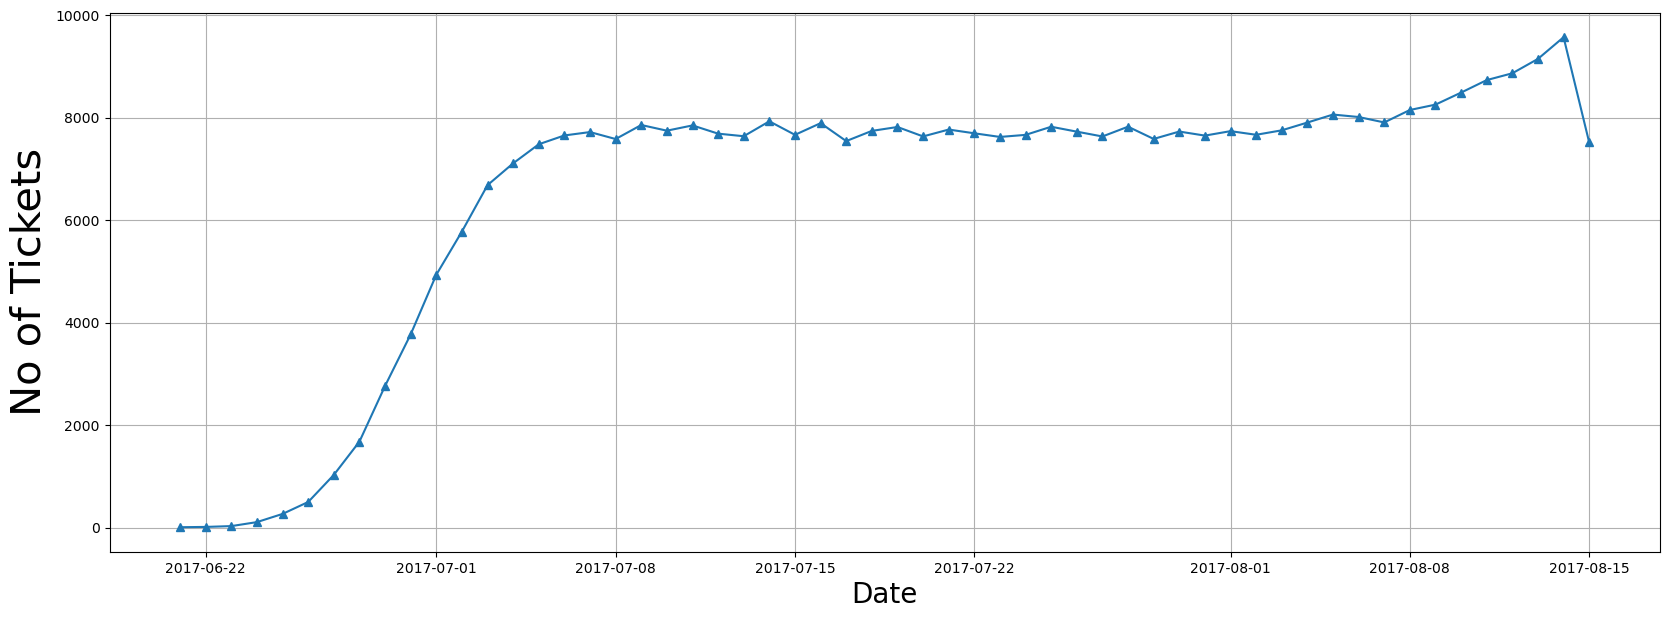

In [17]:
tickets=pd.read_sql_query("""select * from tickets inner join bookings on tickets.book_ref= bookings.book_ref """,Connection)
tickets['book_date']=pd.to_datetime(tickets['book_date'])
tickets['date']=tickets['book_date'].dt.date
x=tickets.groupby('date')[['date']].count()
plt.figure(figsize=(20,7))
plt.plot(x.index,x['date'],marker='^')
plt.xlabel("Date",fontsize=20) 
plt.ylabel("No of Tickets",fontsize=30)
plt.grid('b')
plt.show() 


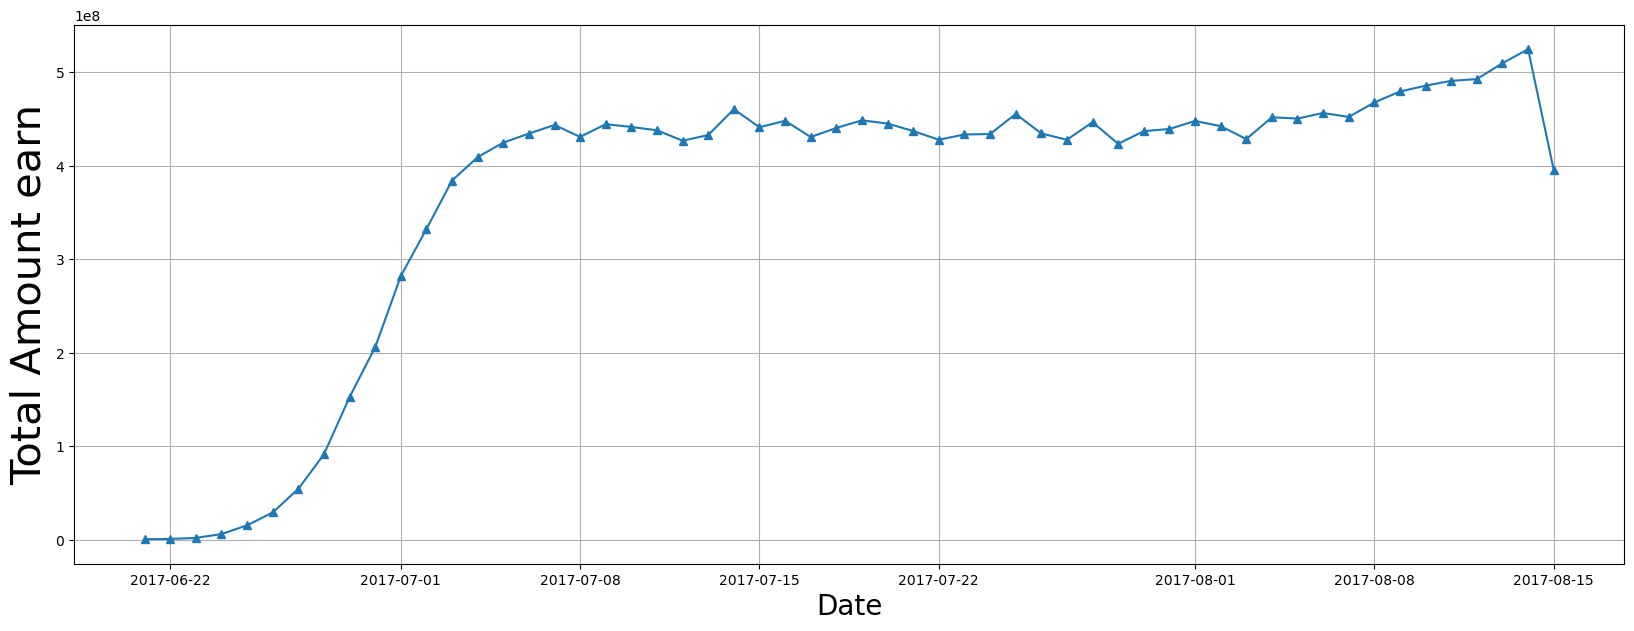

In [18]:
booking=pd.read_sql_query("""select * from   bookings  """,Connection)
booking['book_date']=pd.to_datetime(booking['book_date'])
booking['date']=booking['book_date'].dt.date
x=booking.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(20,7))
plt.plot(x.index,x['total_amount'],marker='^')
plt.xlabel("Date",fontsize=20) 
plt.ylabel("Total Amount earn",fontsize=30)
plt.grid('b')
plt.show()

<AxesSubplot:xlabel='aircraft_code', ylabel='avg_amount'>

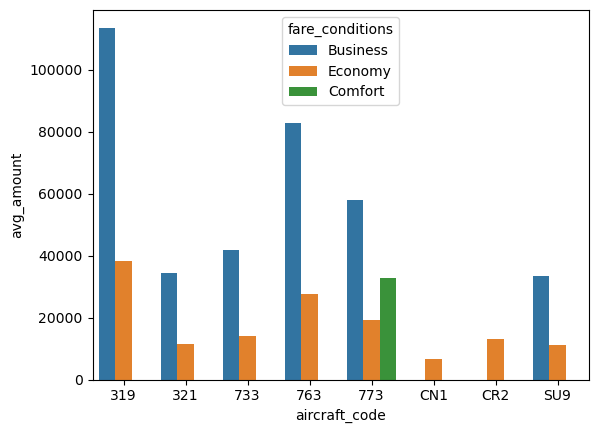

In [19]:
df= pd.read_sql_query("""select aircraft_code,fare_conditions,avg(amount) as avg_amount from 
 flights inner join ticket_flights on  flights.flight_id =ticket_flights.flight_id group by aircraft_code,fare_conditions 
""",Connection)
sns.barplot(data=df,x ='aircraft_code',y ='avg_amount', hue ='fare_conditions')

In [20]:

pd.read_sql_query("""select aircraft_code,total_revenue,no_tickets ,total_revenue/no_tickets as revene_per_ticket from
(select aircraft_code,count(*) as no_tickets,sum(amount) as total_revenue from 
 flights inner join ticket_flights on  flights.flight_id =ticket_flights.flight_id group by aircraft_code)
""",Connection)

,aircraft_code,total_revenue,no_tickets,revene_per_ticket
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


In [41]:
occupnacy=pd.read_sql_query("""select a.aircraft_code,avg(a.no_seats) as Avg_Seats,b.Total_No_seats,avg(a.no_seats)/Total_No_seats 
as occupancy_rate from
(select aircraft_code ,boarding_passes.flight_id,count(seat_no) as no_seats from 
 boarding_passes inner join flights on  boarding_passes.flight_id =flights.flight_id group by aircraft_code,
 boarding_passes.flight_id) as a inner join
 (select aircraft_code, count(*) as Total_No_seats from seats group by aircraft_code) as b
 on a.aircraft_code=b.aircraft_code group by a.aircraft_code
""",Connection)
occupnacy

,aircraft_code,Avg_Seats,Total_No_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


In [47]:
occupnacy['increased_occupancy']=occupnacy['occupancy_rate']+occupnacy['occupancy_rate']*0.1
occupnacy


,aircraft_code,Avg_Seats,Total_No_seats,occupancy_rate,increased_occupancy
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [55]:
pd.set_option("display.float_format",str)
total_revenue=pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from 
 flights inner join ticket_flights on  flights.flight_id =ticket_flights.flight_id group by aircraft_code
""",Connection)
occupnacy['increased_revenue']=(total_revenue['total_revenue']/occupnacy['occupancy_rate'])*occupnacy['increased_occupancy']
occupnacy

,aircraft_code,Avg_Seats,Total_No_seats,occupancy_rate,increased_occupancy,increased_revenue
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
